,Book Title,Price (£)
0,A Light in the Attic,51.770000
1,Tipping the Velvet,53.740000
2,Soumission,50.100000
3,Sharp Objects,47.820000
4,Sapiens: A Brief History of Humankind,54.230000
5,The Requiem Red,22.650000
6,The Dirty Little Secrets of Getting Your Dream Job,33.340000
7,"The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull",17.930000
8,The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics,22.600000
9,The Black Maria,52.150000


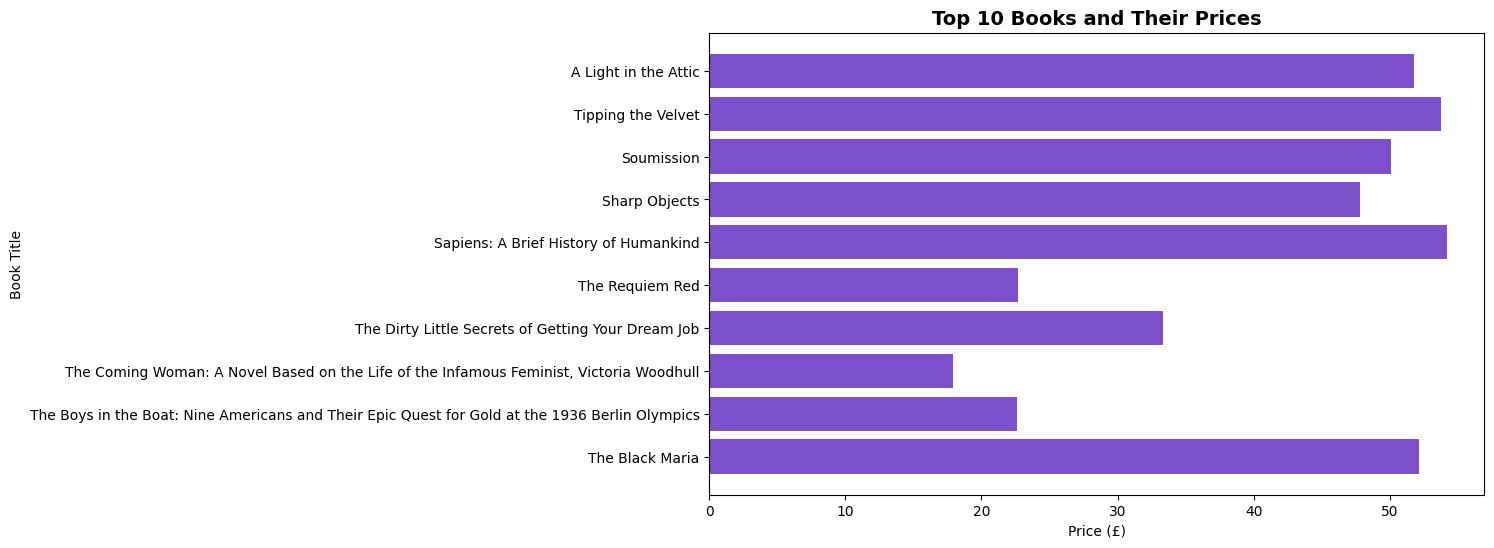

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re

# Step 1: Request the website
url = "http://books.toscrape.com/catalogue/category/books_1/index.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Step 2: Extract book details
titles = []
prices = []

for book in soup.find_all("article", class_="product_pod"):
    title = book.h3.a["title"]
    price = book.find("p", class_="price_color").text.strip()

    # ✅ Keep only numbers and decimal point
    price = re.sub(r"[^\d.]", "", price)
    price = float(price)

    titles.append(title)
    prices.append(price)

# Step 3: Store in DataFrame
data = pd.DataFrame({"Book Title": titles, "Price (£)": prices})

# Step 4: Display nicely in Colab
from IPython.display import display
styled_table = data.head(10).style.set_properties(**{
    'background-color': '#f9f9f9',
    'color': '#4B0082',
    'border-color': 'black'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#7d4fca'), ('color', 'white')]
}])
display(styled_table)

# Step 5: Visualization
plt.figure(figsize=(10,6))
plt.barh(data["Book Title"][:10], data["Price (£)"][:10], color="#7d4fca")
plt.xlabel("Price (£)")
plt.ylabel("Book Title")
plt.title("Top 10 Books and Their Prices", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.show()
